In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Week4: 概率分布
- 度量事件的等可能性
- 随机变量的概率分布
- 样本统计量的概率分布

# 度量事件的等可能性

对事件发生的可能性大小的度量就是**概率**。概率是介于0-1之间的一个值，是对某件事件发生的可能性大小的一种数值度量。

如果事件是**等可能发生**的，可以通过**重复**试验来获得事件的概率。当试验次数很多时，事件A发生的概率P(A)可以由所观测到的事件A发生的频率p来逼近。

假设相同条件下，重复进行n次试验，事件A发生了m次，则事件A发生的概率表示为：
$$
P(A)=\frac{m}{n}=p
$$

## 大数定律
随着试验次数n增大，比值$\frac{m}{n}$将围绕某一频率上下波动，并且波动幅度将随试验次数n增大而减小.

# 随机变量
随机变量时用数值来描述特定试验的一切可能出现的结果，它的取值事先不能确定，具有随机性。有些随机变量只能取有限个值，是**离散型随机变量**；有些可以取一个或多个区间中的任何值，是**连续型随机变量**。

## 随机变量的概括性度量

描述随机变量**集中程度**的统计量为**期望值(expected value)**，描述其**离散程度**的统计量为**方差**。

离散型随机变量的期望计算：

$$
\mu=E(X)=\sum_{i}x_i p_i
$$

连续型随机变量的期望计算：
$$
\mu=E(X)=\int^{\infty}_{-\infty} xf(x)dx
$$


离散型随机变量方差计算
$$
\sigma^2=D(X)=\sum_i(x_i-\mu)^2p_i
$$



连续型随机变量的方差计算：
$$
\sigma^2=D(X)=\int^{\infty}_{-\infty}(x-\mu)^2f(x)dx
$$

## 随机变量4F(Functions)

- PMF
- PDF
- CDF

### PMF

概率质量函数（probability mass function), 在概率论中，概率质量函数是**离散随机变量**在各特定取值上的概率

类似于
$$
P(X=x)
$$

### PDF
概率密度函数（probability density function）, 连续型随机变量的概率密度函数是一个描述某个确定的取值点附近的可能性的函数。

### CDF
累积分布函数 (cumulative distribution function)，是概率密度函数的积分，能完整描述一个实随机变量X的概率分布。

类似于
$$
P(X<x)=F(x)
$$

### PPF

**Percent Point Function(PPF)** 是CDF的反函数,即**累积分布的反函数**。当已知概率p，需要求出能够得到这个概率p的随机变量x，这时候就要用到PPF啦:
$$
F^{-1}(p)=x
$$

[参考](https://www.statisticshowto.datasciencecentral.com/inverse-distribution-function/)

## 离散型概率分布

离散型随机变量X只取有限个可能值$x_1,x_2,\dots,$，而且是以**确定**概率取这些值，即
$$
P(X=x_i)=p_i(i=1,2,...)
$$
离散型概率分布性质：
- $p_i\ge0$
- $\sum_i p_i =1 (i=1,2,\dots)$


### 二项分布

n重伯努利试验条件：

- 一次试验只有**两个**可能结果，即'成功'和'失败'
- 一次试验'成功'的概率为p，'失败'概率为1-p，且概率每次试验都相同
- 试验相互独立，且可以重复进行n次

在n次试验中，'成功'的次数对应一个离散型随机变量X，出现'成功'的次数的概率分布就是**二项分布**，记为$X~B(n,p)$.n次试验中成功次数为x的概率可以表示为：
$$
P(X=x)=\begin{pmatrix}
n \\
x
\end{pmatrix}
p^x(1-p)^{n-x}, x=0,1,2,\dots,n
$$


二项分布的期望:
$$
\mu=E(X)=np
$$
方差
$$
\sigma^2=D(X)=np(1-p)
$$

### scipy计算二项分布


In [27]:
print(stats.binom.pmf(0,5,0.04)) # P(X=0)
print(stats.binom.pmf(1,5,0.04)) # P(X=1)
print(stats.binom.cdf(3,5,0.04)) # P(X<3)

0.8153726976
0.16986931199999997
0.9999876096


### 泊松分布

泊松分布用于**一定时间或一定空间区域内某一事件出现的次数**。比如，一定时间内，航空公司接到的电话数；一定时间内，到站电车的等候人数。记为$X~P(\lambda)$. 对于$X=x$有：

$$
P(X=x)=\frac{\lambda^x e^{-\lambda}}{x!}
$$

- $\lambda$: 一定区间单位内随机变量X的均值

#### scipy计算泊松分布
```py
poisson=stats.poisson(mu)
poisson.pmf(x)
poisson.pdf(x)
```
1. 在`stats.poisson(mu)`中指定$\lambda$值
2. `pmf(x)`计算$P(X=x)$

In [11]:
'''
假定航空公司每小时接到42次订票电话，那么10分钟内恰好接到6次电话的概率是
'''
# mu is the lambda above
mu=7 # mu=10/60*42
poisson=stats.poisson(mu)
poisson.pmf(6)

0.14900277967433773

### 超几何分布

如果采用**不重复抽样**，各次试验并不独立，成功的概率也不相等，而且总体元素的数目N很小或样本n相对于N来说较大，这时，样本中“成功”的次数则服从**超几何分布**，记作$X~H(n,N,M)$. 对于$X=x$有
$$
P(X=x)=
\frac{
\begin{pmatrix}
M \\ x
\end{pmatrix}
\begin{pmatrix}
N-M \\
n-x
\end{pmatrix}
}
{
\begin{pmatrix}
N \\
n
\end{pmatrix}
}
$$
其中$x=0,1,\dots,l \ \ l \in min(M,n)$; n为试验次数，N为总体元素个数，M为总体中代表成功的个数

#### scipy计算超几何分布
```py
rv=stats.hypergeom(N,n,M)
```
- `N`:总体个数
- `n`:样本个数
- `M`:成功个数

In [28]:
n=4 # 样本
M=3 # 成功个数
N=10 # 总体个数

rv=stats.hypergeom(N,n,M)
print(rv.pmf(3)) # P(X=3)
print(1-rv.cdf(1)) # P(X>=2)

0.03333333333333332
0.33333333333333404


## 连续型概率分布

### 正态分布

若随机变量X服从正态分布，记为$X ~ N(\mu,\sigma^2)$


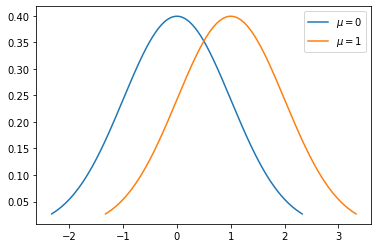

In [18]:
x=np.linspace(stats.norm.ppf(.01),stats.norm.ppf(.99),1000)
x1=np.linspace(stats.norm.ppf(.01,1,1),stats.norm.ppf(.99,1,1),1000)

plt.plot(x,stats.norm.pdf(x),label='$\mu=0$')
plt.plot(x1,stats.norm.pdf(x),label='$\mu=1$')
plt.legend()

#### scipy计算正态分布

计算累积分布函数

`norm.cdf(x,mu,sigma)`
- `mu`: 均值
-`sigma`: 标准差

In [21]:
# mu=50, sigma=10
# P(X<=40)
print(stats.norm.cdf(40,50,10))
# 求P(30<=X<=40)
print(stats.norm.cdf(40,50,10)-stats.norm.cdf(30,50,10))

0.15865525393145707
0.13590512198327787


In [27]:
# mu=0, sigma=1
# P(Z<=2.5)
print(stats.norm.cdf(2.5,0,1))
# p(-1.5<=Z<=2)
print(stats.norm.cdf(2)-stats.norm.cdf(-1.5))

0.9937903346742238
0.9104426667829627


计算正态分布累积分布函数的反函数

`norm.ppf(x,mu,sigma)`

当概率p已知，而我们想求能得到这个概率的x，需要计算CDF的反函数PPF

In [28]:
stats.norm .ppf(.05)

-1.6448536269514729

### t分布
t表示样本均值经标准化后的新随机变量。随着自由度增大，t分布趋于正态分布

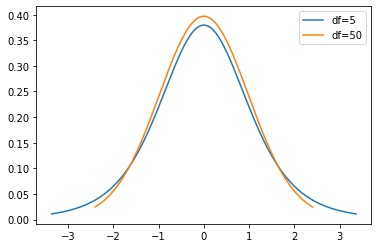

In [43]:
dfs=[5,50]
for df in dfs:
    x=np.linspace(stats.t.ppf(.01,df=df),stats.t.ppf(.99,df=df),1000)
    plt.plot(x,stats.t.pdf(x,df=df), label=f'df={df}')
plt.legend()

当正态总体未知，小样本条件下对总体均值的估计和检验要用t分布。t分布的概率为曲线下面积

### $\chi^2$分布

$\chi^2$分布式n个独立正态变量的平方和分布(n个自由度)，记为$\chi^2(n)$。

设总体服从一般正态分布，则
$$
Z=\frac{X-\mu}{\sigma}~N(0,1)
$$
令$Y=Z^2$，则Y服从自由度为1的$\chi^2$分布，即$Y~\chi^2(1)$。对于n个独立变量$Y_i$，随机变量$Y=\sum_{i=1}^n Y_i^2$的分布具有n个自由度的$\chi^2$分布，记为$Y~\chi^2(n)$

$\chi^2$分布具有如下特点：
- 变量始终为正
- 形状取决于其自由度大小，通常形状为不对称的右偏分布,但随自由度增大逐渐趋于对称
- 期望值$E(\chi^2)=n$, 方差$D(X)=2n$，n为自由度
- 可加性。U+V~$\chi^2(n_1)+\chi^2(n_2)$

#### scipy实现$\chi^2$分布


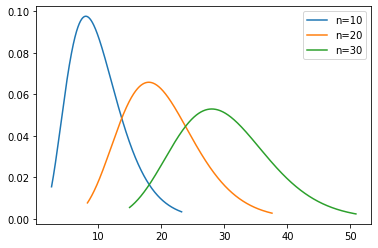

In [16]:
dfs=[10,20,30]
for n in dfs:
    x=np.linspace(stats.chi2.ppf(.01,n),stats.chi2.ppf(.99,n),1000)
    plt.plot(x,stats.chi2.pdf(x,df=n),label=f'n={n}')
    
plt.legend()

#### scipy计算$\chi^2$分布

In [22]:
# n=8, chi2>=10
print(1-stats.chi2.cdf(10,8))

# n=10, 右尾概率为.05反函数值
print(stats.chi2.ppf(1-.05,10))

0.2650259152973615
18.307038053275146


### F分布
F分布是两个$\chi^2$之比。设U~$\chi^2(n_1)$, V~$\chi^2(n_2)$,U和V相互独立，则F=$\frac{U/n_1}{V/n_2}$,记为F~$F(n_1,n_2)$

F分布用于比较不同总体的方差是否有显著差异，其概率为曲线下的面积

### scipy实现F分布

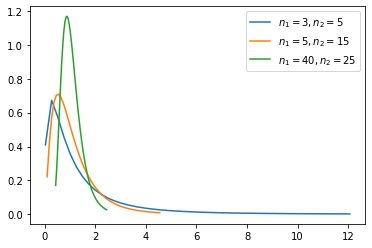

In [28]:
n1=[3,5,40]
n2=[5,15,25]
for dfn,dfd in zip(n1,n2):
    x=np.linspace(stats.f.ppf(.01,dfn,dfd),stats.f.ppf(.99,dfn,dfd))
    plt.plot(x,stats.f.pdf(x,dfn,dfd),label=f'$n_1={dfn}, n_2={dfd}$')
plt.legend()

#### scipy计算F分布


In [33]:
# n1=10, n2=8 P(F>=3)
print(1-stats.f.cdf(3,10,8))

# F分布的右尾概率为0.05的F值
print(stats.f.ppf(1-.05,10,8))

0.06645086271211254
3.3471631202339784


# 样本统计量的概率分布

## 统计量

- **参数**: 对总体某个特征的概括性度量
- **估计量**: 根据样本某个特征的概括性度量

推断统计：样本估计量推断总体参数(均值等)

### 统计量的概率分布

样本统计量的概率分布称为**抽样分布**，由样本统计量的所有可能取值形成的相对频数分布。

## 中心极限定理

样本均值的分布与抽样分布所依据的总体分布和样本量n的大小有关。如果总体是正态分布，则无论样本量大小，**样本均值**的分布都近似于正态分布。

如果总体不是正态分布，如果样本量$n\ge30$，样本均值的概率分布都趋于正态分布